## Basic Information (Brain Lower Grade Glioma) 

Siqi Liu

In [26]:
import numpy as np 
import pandas as pd 
import scanpy as sc 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sc.settings.verbosity = 3 

sc.settings.set_figure_params(dpi = 80)
%matplotlib inline

## Gene Data

In [2]:
# read the gene expression data: 
raw_data_rna = pd.read_table("./data/data_mrna_seq_v2_rsem.txt", sep="\t")
raw_data_rna.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,8.7141,36.4493,11.8131,8.6116,0.000,5.3382,3.7845,8.3071,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
2,UBE2Q2P2,100134869,22.7523,21.1767,11.0242,5.0835,30.261,27.8886,8.7230,15.4466,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
3,HMGB1P1,10357,268.5760,156.6870,185.1380,269.8360,216.341,159.7590,198.1880,208.5410,...,127.7470,106.8290,205.5170,184.4080,125.5470,124.9190,133.7390,120.9240,107.2540,143.0060
4,NaN,10431,845.8150,390.2690,621.4530,835.7290,812.508,576.9050,551.9470,607.8960,...,564.3620,603.3720,570.9130,760.7160,875.1410,658.2210,662.6510,524.7240,705.1280,748.5820


In [3]:
# choosing Entrez_Gene_Id as column because: 
print(f"There are {len(raw_data_rna[raw_data_rna.Entrez_Gene_Id.isna()])} genes has no ids")
print("we would use Entrez_Gene_Id as name of gene with a correponding dictionary table")
gene_symbol_id = raw_data_rna.iloc[:,:2].copy()
gene_symbol_id.tail()

There are 0 genes has no ids
we would use Entrez_Gene_Id as name of gene with a correponding dictionary table


,Hugo_Symbol,Entrez_Gene_Id
20526,ZYG11A,440590
20527,ZYG11B,79699
20528,ZYX,7791
20529,ZZEF1,23140
20530,ZZZ3,26009


In [4]:
# transpose the data and make the gene id as the column names: 
df_clean = raw_data_rna.set_index("Entrez_Gene_Id").drop("Hugo_Symbol", axis = 1).transpose()
print(f"There are {len(df_clean)} samples in total, and there are {len(df_clean.columns)} genes in total.")
df_clean.head()

There are 514 samples in total, and there are 20531 genes in total.


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-CS-4938-01,0.0,8.7141,22.7523,268.576,845.815,0.0,182.505,0.4196,0.0,0.0,...,80.1636,50.3461,64.1913,523.180,1311.52,0.0000,1495.70,1598.91,1171.810,836.165
TCGA-CS-4941-01,0.0,36.4493,21.1767,156.687,390.269,0.0,325.052,1.7253,0.0,0.0,...,187.2980,110.4210,105.9350,467.564,1226.71,0.3451,1751.21,3889.92,1707.730,1015.530
TCGA-CS-4942-01,0.0,11.8131,11.0242,185.138,621.453,0.0,131.142,0.0000,0.0,0.0,...,120.0310,186.5050,115.2250,454.325,1102.42,0.3460,1586.16,2214.53,1423.880,706.920
TCGA-CS-4943-01,0.0,8.6116,5.0835,269.836,835.729,0.0,83.475,0.3261,0.0,0.0,...,667.4480,1183.6500,89.0183,491.068,1288.32,3.2607,1760.15,2131.55,1916.990,689.321
TCGA-CS-4944-01,0.0,0.0000,30.2610,216.341,812.508,0.0,80.696,0.0000,0.0,0.0,...,57.3244,56.4872,42.3654,323.793,1012.73,0.5044,1225.07,1692.60,729.794,456.941


In [5]:
# check the quality of the data: 
# 1) if there is any NA data
print(f"If there is NA values: {df_clean.isnull().values.any()}")

# 2) if there are columns with all the same value
unique_counts = df_clean.nunique()
same_value_cols = unique_counts[unique_counts == 1].index.tolist()
print(f"There are {len(same_value_cols)} columns with the same value.")
print(f"{same_value_cols[0:10]}...")

If there is NA values: False
There are 307 columns with the same value.
[136542, 317712, 728045, 728036, 255313, 728096, 728062, 653282, 728042, 57135]...


In [6]:
# thus, we need to drop all of same_value_cols: 
df_clean_1 = df_clean.drop(same_value_cols, axis = 1)
df_clean_1.head(3)

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,155060,26823,280660,340602,388795,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-CS-4938-01,0.0,8.7141,22.7523,268.576,845.815,182.505,0.4196,0.0,2.0978,0.4196,...,80.1636,50.3461,64.1913,523.180,1311.52,0.0000,1495.70,1598.91,1171.81,836.165
TCGA-CS-4941-01,0.0,36.4493,21.1767,156.687,390.269,325.052,1.7253,0.0,3.4507,0.3451,...,187.2980,110.4210,105.9350,467.564,1226.71,0.3451,1751.21,3889.92,1707.73,1015.530
TCGA-CS-4942-01,0.0,11.8131,11.0242,185.138,621.453,131.142,0.0000,0.0,1.7301,0.3460,...,120.0310,186.5050,115.2250,454.325,1102.42,0.3460,1586.16,2214.53,1423.88,706.920


In [27]:
adata_gene = sc.AnnData(df_clean_1)

In [28]:
adata_gene

AnnData object with n_obs × n_vars = 514 × 20224

In [29]:
adata_gene.n_obs

514

In [30]:
adata_gene.var_names

Index(['100130426', '100133144', '100134869', '10357', '10431', '155060',
       '26823', '280660', '340602', '388795',
       ...
       '55055', '11130', '7789', '158586', '79364', '440590', '79699', '7791',
       '23140', '26009'],
      dtype='object', name='Entrez_Gene_Id', length=20224)

normalizing counts per cell
    finished (0:00:00)


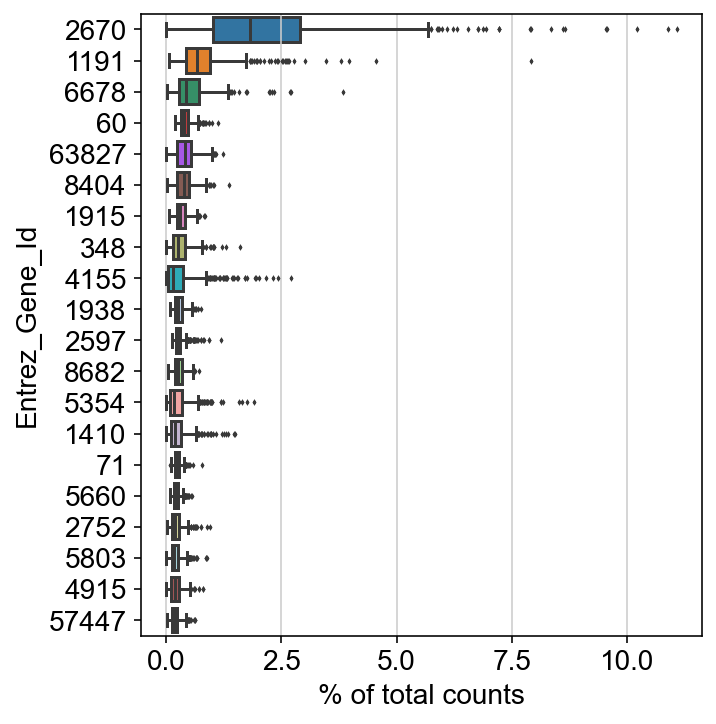

In [31]:
sc.pl.highest_expr_genes(adata_gene, n_top=20, )
#Show those genes that yield the highest fraction of counts in each single cell, across all cells.

### Data preprocessing

In [18]:
# filter cell outliers based on counts and numbers of genes expressed 
# sc.pp.filter_cells(adata_gene, min_genes=200)
# sc.pp.filter_genes(adata_gene, min_cells = 3)

filtered out 114 genes that are detected in less than 3 cells


In [34]:
sc.tl.pca(adata_gene, svd_solver='arpack')
sc.pp.neighbors(adata_gene, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata_gene, min_dist=0.3) 

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


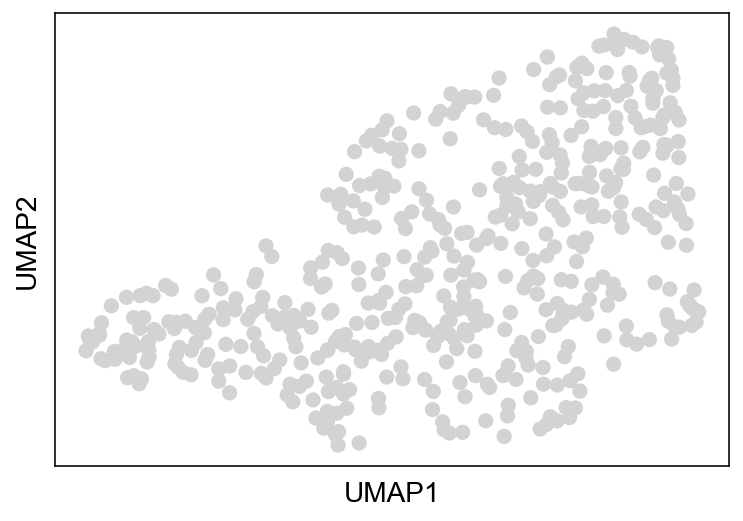

In [35]:
sc.pl.umap(adata_gene, color = a)

## Mutation Data

In [37]:
raw_data_mutation = pd.read_table("./data/data_mutations.txt", sep="\t")
raw_data_mutation

<ipython-input-37-5cb6d0f5989b>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data_mutation = pd.read_table("./data/data_mutations.txt", sep="\t")


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,SYMBOL_SOURCE,TREMBL,TSL,UNIPARC,VARIANT_CLASS,all_effects,cDNA_position,n_depth,t_depth,Annotation_Status
0,CELF6,60677.0,.,GRCh37,15,72608207,72608207,+,synonymous_variant,Silent,...,HGNC,B3KWE6_HUMAN,.,UPI000006F0AA,SNV,"CELF6,synonymous_variant,p.%3D,ENST00000567083...",579,17,18,SUCCESS
1,GPR114,0.0,.,GRCh37,16,57601804,57601804,+,missense_variant,Missense_Mutation,...,HGNC,.,.,UPI0000039944,SNV,"GPR114,missense_variant,p.Asn286Lys,ENST000003...",1381,43,47,SUCCESS
2,TP53,7157.0,.,GRCh37,17,7577539,7577539,+,missense_variant,Missense_Mutation,...,HGNC,"S5LQU8_HUMAN,Q761V2_HUMAN,Q6IT77_HUMAN,Q1HGV1_...",.,UPI000002ED67,SNV,"TP53,missense_variant,p.Arg248Trp,ENST00000413...",932,117,102,SUCCESS
3,KLK10,5655.0,.,GRCh37,19,51518742,51518742,+,synonymous_variant,Silent,...,HGNC,M0R132_HUMAN,.,UPI000013CCB0,SNV,"KLK10,synonymous_variant,p.%3D,ENST00000391805...",828,363,364,SUCCESS
4,C3,718.0,.,GRCh37,19,6686853,6686853,+,stop_gained,Nonsense_Mutation,...,HGNC,"Q6LDJ0_HUMAN,M0R1Q1_HUMAN",.,UPI000013EC9B,SNV,"C3,stop_gained,p.Gln49Ter,ENST00000601008,;C3,...",3643,163,144,SUCCESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39294,CABP5,56344.0,.,GRCh37,19,48533797,48533797,+,3_prime_UTR_variant,3'UTR,...,HGNC,.,.,UPI0000126D6A,SNV,"CABP5,3_prime_UTR_variant,,ENST00000293255,;",670,42,81,SUCCESS
39295,HIST1H2BD,0.0,.,GRCh37,6,26158800,26158800,+,intron_variant,Intron,...,HGNC,.,.,UPI0000001BD3,SNV,"HIST1H2BD,3_prime_UTR_variant,,ENST00000377777...",.,40,60,SUCCESS
39296,HOXA2,3199.0,.,GRCh37,7,27140265,27140265,+,3_prime_UTR_variant,3'UTR,...,HGNC,.,.,UPI0000049C49,SNV,"HOXA2,3_prime_UTR_variant,,ENST00000222718,;HO...",1522,25,40,SUCCESS
39297,PLIN2,123.0,.,GRCh37,9,19116192,19116192,+,3_prime_UTR_variant,3'UTR,...,HGNC,"Q6FHZ7_HUMAN,Q5SYF5_HUMAN,B4DJK9_HUMAN",.,UPI0000125535,SNV,"PLIN2,3_prime_UTR_variant,,ENST00000276914,;PL...",1548,42,38,SUCCESS


In [44]:
raw_data_mutation.iloc[0,:]

Hugo_Symbol                                                      CELF6
Entrez_Gene_Id                                                 60677.0
Center                                                               .
NCBI_Build                                                      GRCh37
Chromosome                                                          15
                                           ...                        
all_effects          CELF6,synonymous_variant,p.%3D,ENST00000567083...
cDNA_position                                                      579
n_depth                                                             17
t_depth                                                             18
Annotation_Status                                              SUCCESS
Name: 0, Length: 114, dtype: object

## Clinical Patient

In [60]:
raw_data_sample = pd.read_table("./data/data_clinical_sample.txt", sep="\t")
raw_data_sample.head()

,#Patient Identifier,Sample Identifier,Oncotree Code,Cancer Type,Cancer Type Detailed,Tumor Type,Neoplasm Histologic Grade,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site Code,Tumor Disease Anatomic Site,Aneuploidy Score,Sample Type,MSI MANTIS Score,MSIsensor Score,Somatic Status,TMB (nonsynonymous),Tissue Source Site
0,#Identifier to uniquely specify a patient.,A unique sample identifier.,Oncotree Code,Cancer Type,Cancer Type Detailed,Tumor Type,Numeric value to express the degree of abnorma...,Tissue prospective collection indicator.,Tissue retrospective collection indicator.,Tissue Source Site Code,Text term that describes the anatomic site of ...,Aneuploidy Score,"The type of sample (i.e., normal, primary, met...",MSI Score reported by MANTIS. The suggested th...,MSI Score reported by MSIsensor. The suggested...,Somatic Status,TMB (nonsynonymous),"A Tissue Source Site collects samples (tissue,..."
1,#STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,NUMBER,STRING,NUMBER,NUMBER,STRING,NUMBER,STRING
2,#1,1,1,1,1,1,1,1,1,1,1,1,9,9,9,1,1,1
3,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE
4,TCGA-CS-4938,TCGA-CS-4938-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G2,No,Yes,CS,CNS,1,Primary,0.303,0,Matched,0.466666667,Thomas Jefferson University


In [61]:
raw_data_sample.columns = raw_data_sample.iloc[3,:]
raw_data_sample = raw_data_sample.drop([0,1,2,3], axis = 0)

In [62]:
df_patient = raw_data_sample.reset_index().drop(["index"], axis = 1)
df_patient.head()

3,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE
0,TCGA-CS-4938,TCGA-CS-4938-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G2,No,Yes,CS,CNS,1,Primary,0.303,0,Matched,0.466666667,Thomas Jefferson University
1,TCGA-CS-4941,TCGA-CS-4941-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,7,Primary,0.2736,0,Matched,1.466666667,Thomas Jefferson University
2,TCGA-CS-4942,TCGA-CS-4942-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,2,Primary,0.281,0.02,Matched,0.866666667,Thomas Jefferson University
3,TCGA-CS-4943,TCGA-CS-4943-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G3,No,Yes,CS,CNS,5,Primary,0.2751,0.25,Matched,0.8,Thomas Jefferson University
4,TCGA-CS-4944,TCGA-CS-4944-01,DIFG,Glioma,Astrocytoma,Astrocytoma,G2,No,Yes,CS,CNS,1,Primary,0.2697,0.04,Matched,0.7,Thomas Jefferson University
